# 3 Custom Environments
In this task you are asked to create a environment for a reinforcement agent. It's common to create environments for agents by using the openai gym interface. It creates a good baseline for what is necessary to train a RL agent and makes it easy to try out different environments on the same algorithm.
If you need more information take a look at the documentation https://www.gymlibrary.ml/.
You can find the implementation of all official enviroments on GitHub: https://github.com/openai/gym/tree/master/gym/envs if you need some examples. 

In [13]:
pip install gym==0.21.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install prettytable

In [24]:
import gym
import numpy as np
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## 3.1 The Environment
A openai gym environment consists of at least 3 methods. `__init__` the constructor which sets all the necassary values, a `step` function, which describes the behaviour of the environment and a `reset` function, which resets the starting state of the environment. In addition to that usually a `render` function is provided to visualize the behaviour of the environment.

#### \__init__:
The Constructor of the environment defines all the necassary variables. To set the bounds of our environment we have to define the action_space and the observartion space. The gym.spaces library contains the necassary functions to do in our case we use gym.spaces.Discrete because we wan to only handle discrete values.
The Discrete space works a bit like a range, with some extra methods. A Linear representation of the state is helpful for tabular learning, because it makes creating a Q-Table really easy. 

#### step:
The step method takes an action and returns a tuple of the shape(observation, reward, done). The observation is the result of taking the action. The reward is the reward handet for takin given action in the previous state. The done variable is boolean and indicates if a given scenario has come to an end. 

#### reset:
The reset method rests the start state of the environment. It returns the new state of the environment.

#### render:
The render method visualizes the state of the environment. There are many different ways to do so i.e. creating a visual representation by using vector graphics or printing to the terminal. 
We want to focus on the easiest way, by printing the state. Find a good and easily printable representation of the internal state (i.e. a numpy array) and print it. To print over the last output you can call the  function before you print the state.

### Encoding and decoding
This functions are not necessary for a gym environment. However it might be usefull do write some functions that encode and decode the linearized state to a 2D imensional Form and back.

#### decode_action
returns the action refering to the index of the action

#### decode_state
returns a 2D representation of the linear state

#### encode_state
returns a linear representation of the 2D state.


### Task 3.1.1
- Create a two dimensional, discrete environment of the size 10x10.
- Each episode the agent should start at a random position, while the target always stays at the same position.
- The agent should be able to move in all 4 directions, If the agent hits a wall it should do nothing.
- An episode ends if the agent reaches the target.
- Reaching the target results in a reward of 10, while every other action should give a small negative reward.

In [25]:
class CustomEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self):
        super(CustomEnv, self).__init__()
        # Write a constructor for your enviroment
        # Define the action_space and observation_space
        # Position your agent and the target in the enviroment
        self.observation_space = gym.spaces.Discrete(100)
        self.action_space = gym.spaces.Discrete(4)
        self.state = self.reset()
        self.target_loc = (3, 3)
        
    def step(self, action):
        # Write the step method for your enviroment. Make sure you agent does not go out of bounds
        # by performing the action.
        reward = -1
        done = False
        agent_loc = self.decode_state(self.state)
        
        if action == 0 and agent_loc[0] > 0:
            agent_loc = (agent_loc[0] -1, agent_loc[1])
        if action == 2 and agent_loc[0] < 9:
            agent_loc = (agent_loc[0] +1, agent_loc[1])
            
        if action == 3 and agent_loc[1] > 0:
            agent_loc = (agent_loc[0], agent_loc[1] -1)
        if action == 1 and agent_loc[1] < 9:
            agent_loc = (agent_loc[0], agent_loc[1] +1)
        
        if agent_loc == self.target_loc:
            reward = 10
            done = True
        
        self.state = self.encode_state(agent_loc)
        observation = self.state
        
        return (observation, reward, done,_)
     
    def reset(self):
        # Write the reset method that results in the starting state
        state = np.random.randint(0, 100)
        return state
        
    def render(self):
        #Write a render method for your enviroment to visualize the current state in the terminal
        render_matrix = np.zeros((10, 10))
        render_matrix[self.decode_state(self.state)[0], self.decode_state(self.state)[1]] = 8
        render_matrix[self.target_loc[0], self.target_loc[1]] = 1
        print(render_matrix)

    def decode_action(self, action):
        #decode a linear action to 2D
        return 

    def decode_state(self, state):
        #decode a linear state to 2D
        y = state % 10
        x = (state - y) // 10
        return (x, y)
    
    def encode_state(self, state):
        #encode a 2D state in 1D
        return 10*state[0]+state[1]
    

## 3.2 Test with a random agent
The following cell allows you to test your enviroment with a random agent.

In [26]:
env = CustomEnv()
done = False
while done == False:
    a = env.action_space.sample()
    _,_, done,_ = env.step(a)
    clear_output(wait=True)
    env.render()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Task 3.3 Test with a Q-Learning Agent
In the previous task we wrote an agent that used the SARSA algorithm. Now we want to use a similar algorithm, Q-Learning, to solve your own custom environment. And of course visualise your training progress (Cumulative rewards over time).

The main difference between SARSA and Q-Learning is the way the Q-Values are calculated. Therefore, you can recycle most of your code.

done


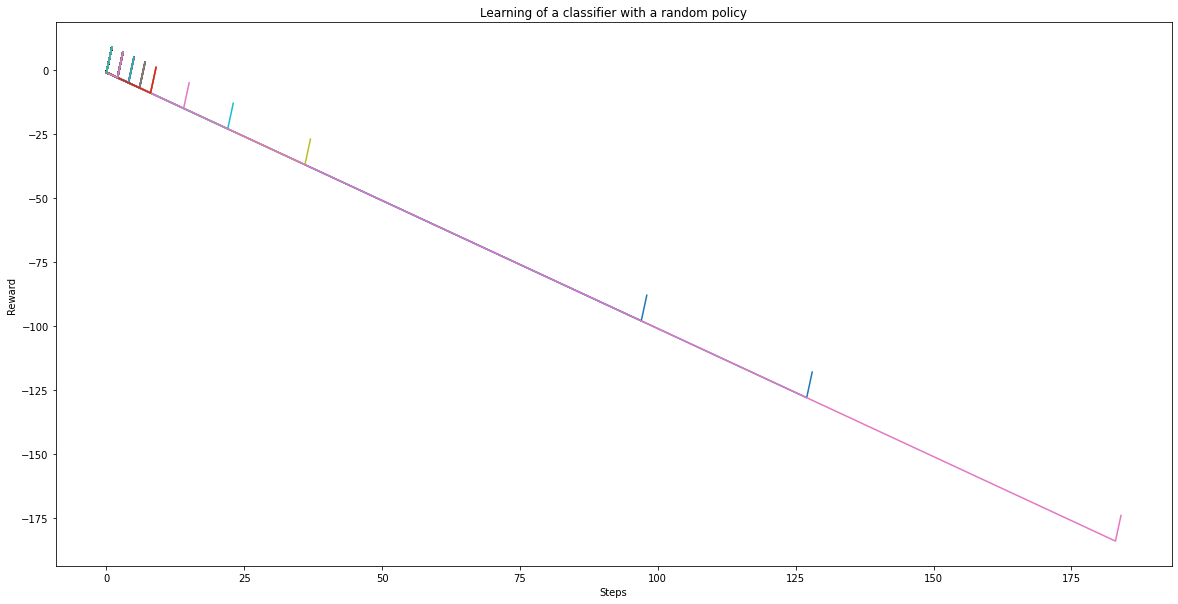

In [27]:
env.reset()

def init_table():
    qtable = np.zeros((env.observation_space.n, env.action_space.n))
    return qtable

def exploit(state):
    possible_actions = table[state]
    return np.argmax(possible_actions)

def explore(state):
    possible_actions = table[state]
    return np.random.randint(0, env.action_space.n)

epsilon = 0.1

def eps_greedy(state):
    if np.random.rand() < epsilon:
        return explore(state)
    else:
        return exploit(state)
    
gamma = 0.99

def td_error(s, a, r, s_prime, a_prime):
    #we know this be wrong, but don't know how to make it be right
    #q-learning is just too much for our little brains :O
    delta = r + (gamma * table[s_prime, a_prime]) - table[s, a]
    return delta

eta = 0.1

def update_table(s, a, delta):
    table[s, a] = table[s, a] + eta*delta
    
table = init_table()
episodes = 2000

def train():
    cumulative_rewards = []
    
    for episode in range(episodes):
        cumulative_rewards.append([])
        
        state = env.reset()
        action = eps_greedy(state)
        done = False
        while not done:
            nextstate, reward, done, _ = env.step(action)
            nextaction = eps_greedy(nextstate)
            delta = td_error(state, action, reward, nextstate, nextaction)
            update_table(state, action, delta)
            state, action = nextstate, nextaction
            cumulative_rewards[episode].append(reward if len(cumulative_rewards[episode]) == 0 else cumulative_rewards[episode][-1] + reward)
        #nb_render(env)
            
    print("done")
    return cumulative_rewards

train_rewards = train()

# Figure
plt.figure(figsize=[20, 10])
for i in range(len(train_rewards)):
    plt.plot(train_rewards[i])
plt.title("Learning of a classifier with a random policy")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.show()

In [29]:
table = PrettyTable(['Episode', 'Final Reward'])
for i in range(len(train_rewards)):
    table.add_row([i, train_rewards[i][-1]])

print(table)

+---------+--------------+
| Episode | Final Reward |
+---------+--------------+
|    0    |     -88      |
|    1    |      3       |
|    2    |      9       |
|    3    |      9       |
|    4    |      9       |
|    5    |      9       |
|    6    |      9       |
|    7    |      9       |
|    8    |      9       |
|    9    |      9       |
|    10   |     -118     |
|    11   |      9       |
|    12   |      7       |
|    13   |      9       |
|    14   |      9       |
|    15   |      9       |
|    16   |      9       |
|    17   |      9       |
|    18   |      9       |
|    19   |      9       |
|    20   |      9       |
|    21   |      9       |
|    22   |      9       |
|    23   |      9       |
|    24   |      9       |
|    25   |      7       |
|    26   |      9       |
|    27   |      9       |
|    28   |     -27      |
|    29   |      9       |
|    30   |      9       |
|    31   |      9       |
|    32   |      9       |
|    33   |      9       |
|

### Task 3.3.1 Size concerns for Tabular RL:
The table for learning our simple enviroment has the size 100x4 for now. Since we have 100 possible States and 4 actions. How much bigger would the table get if we allowed the target to be placed anywhere?  

In [ ]:
#Your Answer here
#If the target location would be allowed to change during training, we would have 100*100*4 = 40.000 options